In [156]:
from shutil import move
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [157]:
df = pd.read_csv("/kaggle/input/flipkart-sales-data/flipkart_sales.csv")

In [158]:
df.head()

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1


In [159]:
df.tail()

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
995,ORD00996,Smartphone,Electronics,28995.81,3,86987.43,2025-01-13,COD,5.0
996,ORD00997,Perfume,Beauty,32799.51,2,65599.02,2024-12-18,Wallet,2.4
997,ORD00998,Face Cream,Beauty,40840.80,1,40840.80,2024-07-26,UPI,3.1
998,ORD00999,Cookware Set,Home & Kitchen,34741.79,4,138967.16,2024-10-02,Net Banking,3.2
999,ORD01000,Table Lamp,Home & Kitchen,16698.12,4,66792.48,2024-03-26,Credit Card,1.6


In [160]:
df.shape

(1000, 9)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [162]:
df.isnull().sum()

Order ID             0
Product Name         0
Category             0
Price (INR)          0
Quantity Sold        0
Total Sales (INR)    0
Order Date           0
Payment Method       0
Customer Rating      0
dtype: int64

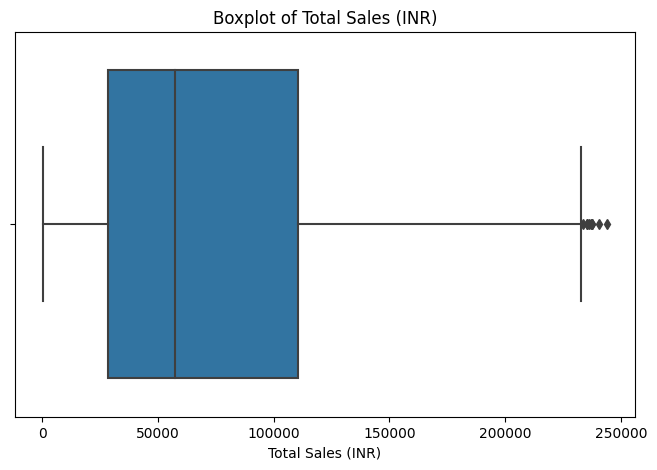

In [163]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Total Sales (INR)"])
plt.title("Boxplot of Total Sales (INR)")
plt.show()

In [164]:
#Cleaning Data 
#Find Outliers and drop them
Q1 = df["Total Sales (INR)"].quantile(0.25)
Q3 = df["Total Sales (INR)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = df[(df["Total Sales (INR)"] < lower_bound) | (df["Total Sales (INR)"] > upper_bound)]
print(outliers)
df = df.drop(outliers.index)
df.shape

     Order ID    Product Name        Category  Price (INR)  Quantity Sold  \
11   ORD00012        Lipstick          Beauty     48780.78              5   
431  ORD00432      Smartphone     Electronics     46770.01              5   
543  ORD00544         Perfume          Beauty     47111.56              5   
587  ORD00588           Jeans        Clothing     47535.79              5   
657  ORD00658          Jacket        Clothing     47047.23              5   
683  ORD00684           Dress        Clothing     48130.60              5   
831  ORD00832      Table Lamp  Home & Kitchen     47284.54              5   
863  ORD00864  Self-Help Book           Books     47427.30              5   
924  ORD00925           Jeans        Clothing     47480.71              5   

     Total Sales (INR)  Order Date Payment Method  Customer Rating  
11           243903.90  2024-04-13            UPI              1.3  
431          233850.05  2024-04-10    Net Banking              2.9  
543          235557.80

(991, 9)

In [165]:
df.describe()

,Price (INR),Quantity Sold,Total Sales (INR),Customer Rating
count,991.000000,991.000000,991.000000,991.000000
mean,24311.493179,3.079717,73738.920424,3.012815
std,14080.758678,1.405150,57667.613448,1.147631
min,139.850000,1.000000,419.550000,1.000000
25%,12229.920000,2.000000,28558.225000,2.000000
50%,24384.050000,3.000000,56717.820000,3.100000
75%,35794.070000,4.000000,108863.170000,4.000000
max,49911.750000,5.000000,232816.750000,5.000000


In [166]:
top_item = df[df["Total Sales (INR)"] == df["Total Sales (INR)"].max()]

In [167]:
top_item

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
943,ORD00944,Fiction Novel,Books,46563.35,5,232816.75,2024-05-08,Debit Card,1.2


In [168]:
#Split data 20% to test and 80% to train
x = df[["Price (INR)", "Quantity Sold", "Customer Rating"]]
y = df["Total Sales (INR)"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [169]:
model_svm = SVR()
model_svm.fit(x_train , y_train)
y_predict_svm = model_svm.predict(x_test)

mae_svm = mean_absolute_error(y_test , y_predict_svm)
print(f"MAE (SVR): {mae_svm}")

MAE (SVR): 46382.04348056793


In [170]:
#n_estimators=100 จำนวนต้นไม้ 100 ต้น
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train , y_train)
y_predict_rf = model_rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_predict_rf)
print(f"MAE (Random Forest): {mae_rf}")

MAE (Random Forest): 750.4809376884491


In [171]:
#dump model
joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(model_svm , 'model_svm.pkl')

['model_svm.pkl']

In [172]:
move('model_rf.pkl', '/kaggle/working/model_rf_new.pkl')
move('model_svm.pkl', '/kaggle/working/model_svm_new.pkl')

'/kaggle/working/model_svm_new.pkl'